In [1]:
import numpy as np
import pandas as pd

DATASET_PATH_train = '/Users/ars/GU_AI/GU_Numpy_Pandas/project_task/train.csv'
df_train = pd.read_csv(DATASET_PATH_train)

DATASET_PATH_test = '/Users/ars/GU_AI/GU_Numpy_Pandas/project_task/test.csv'
df_test = pd.read_csv(DATASET_PATH_test)


In [2]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Обзор датасетов  train и test

In [3]:
df_train.info()
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [4]:
df_train.shape
df_test.shape

(5000, 19)

In [5]:
df_train.set_index('Id', inplace=True)
df_test.set_index('Id', inplace=True)

In [6]:
df_train[['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'HouseFloor', 'Ecology_1', 'Healthcare_1']].describe()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,5202.000000
mean,1.890500,56.315775,37.199645,6.273300,12.609400,0.118858,1142.904460
std,0.839512,21.058732,86.241209,28.560917,6.775974,0.119025,1021.517264
min,0.000000,1.136859,0.370619,0.000000,0.000000,0.000000,0.000000
25%,1.000000,41.774881,22.769832,1.000000,9.000000,0.017647,350.000000
50%,2.000000,52.513310,32.781260,6.000000,13.000000,0.075424,900.000000
75%,2.000000,65.900625,45.128803,9.000000,17.000000,0.195781,1548.000000
max,19.000000,641.065193,7480.592129,2014.000000,117.000000,0.521867,4849.000000


In [7]:
df_test[['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'HouseFloor', 'Ecology_1', 'Healthcare_1']].describe()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1
count,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,2623.000000
mean,1.910000,56.449500,36.158810,5.976800,12.601000,0.119874,1146.657263
std,0.838594,19.092787,17.825287,9.950018,6.789213,0.120070,1044.744231
min,0.000000,1.378543,0.333490,0.000000,0.000000,0.000000,0.000000
25%,1.000000,41.906231,23.092026,1.000000,9.000000,0.019509,325.000000
50%,2.000000,52.921340,32.925087,6.000000,12.000000,0.072158,900.000000
75%,2.000000,66.285129,45.174091,9.000000,17.000000,0.195781,1548.000000
max,17.000000,223.453689,303.071094,620.000000,99.000000,0.521867,4849.000000


In [8]:
df_train.isna().sum()


DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [9]:
df_test.isna().sum()


DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

# Работа с выбросами и пропусками


# Замена выбросов по 'LifeSquare' медианой из df_train

In [10]:
df_train['LifeSquare'].fillna(df_train['LifeSquare'].median(), inplace = True)

In [11]:
df_test['LifeSquare'].fillna(df_train['LifeSquare'].median(), inplace = True)

# Замена выбросов по 'Healthcare_1' медианой из df_train


In [12]:
df_train['Healthcare_1'].fillna(df_train['Healthcare_1'].median(), inplace = True)

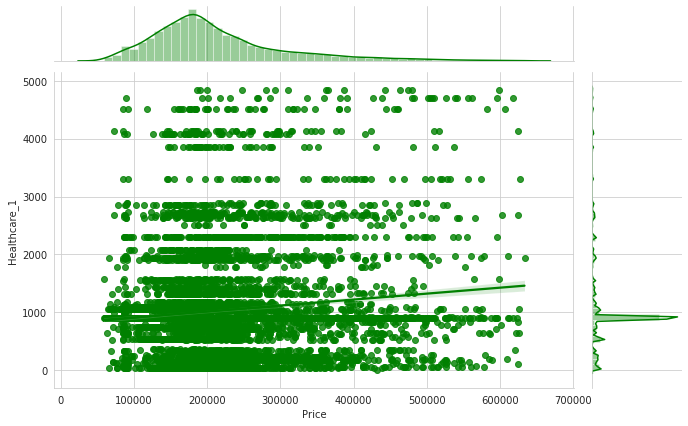

In [13]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['Price'], df_train['Healthcare_1'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

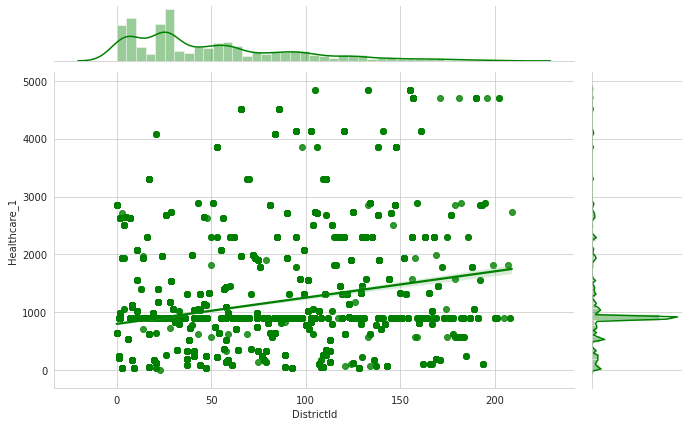

In [14]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['DistrictId'], df_train['Healthcare_1'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

In [16]:
df_train['Healthcare_1' + '_log'] = np.log(df_train['Healthcare_1'])

In [17]:
df_train['Healthcare_1'].sort_values().value_counts()

900.0     4869
540.0      511
30.0       348
1046.0     245
750.0      163
          ... 
370.0       14
32.0        12
1815.0      10
35.0         2
0.0          1
Name: Healthcare_1, Length: 79, dtype: int64

In [18]:
df_train['Healthcare_1_log'].sort_values()

Id
9944         -inf
6306     3.401197
10753    3.401197
6184     3.401197
10930    3.401197
           ...   
5022     8.486528
8428     8.486528
8297     8.486528
8506     8.486528
10741    8.486528
Name: Healthcare_1_log, Length: 10000, dtype: float64

In [19]:
df_train.loc[df_train['Healthcare_1_log'] < 0, 'Healthcare_1_log' ] = df_train['Healthcare_1_log'].median()

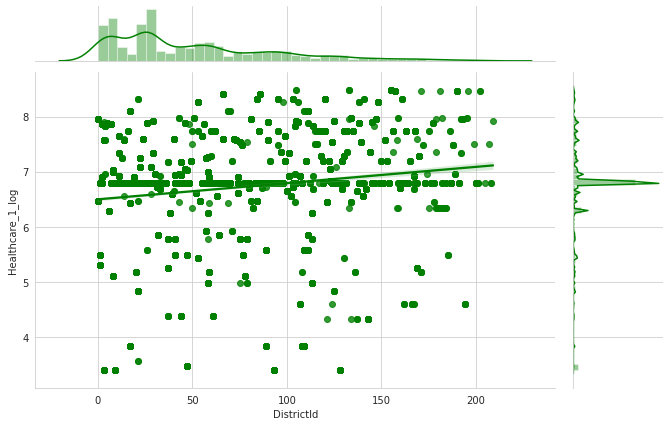

In [20]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['DistrictId'], df_train['Healthcare_1_log'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

In [21]:
df_train.corr()['Price'].sort_values()

Ecology_1          -0.058381
HouseYear           0.004305
Healthcare_1_log    0.022167
KitchenSquare       0.028864
Social_3            0.074878
LifeSquare          0.078331
HouseFloor          0.088280
Healthcare_1        0.128059
Floor               0.128715
Shops_1             0.180876
Social_2            0.239226
Helthcare_2         0.253090
Social_1            0.263286
DistrictId          0.265100
Square              0.520075
Rooms               0.550291
Price               1.000000
Name: Price, dtype: float64

In [22]:
df_test['Healthcare_1'].fillna(df_train['Healthcare_1'].median(), inplace = True)

# Замена выбросов по 'Square' медианой из df_train


In [23]:
df_train['Square'].value_counts().sort_values()

81.053044    1
43.810335    1
96.730985    1
50.159704    1
76.133493    1
            ..
35.853899    1
42.560971    1
66.909689    1
53.541322    1
97.664912    1
Name: Square, Length: 10000, dtype: int64

In [26]:
df_train.loc[df_train['Square'] > 250, 'Square'] = df_train['Square'].median()

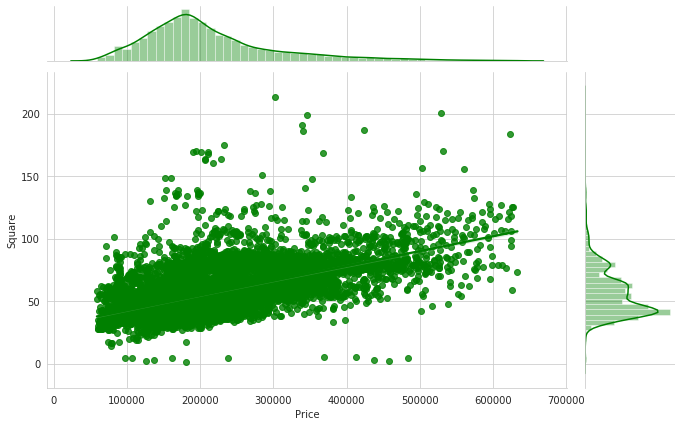

In [27]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['Price'], df_train['Square'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

In [28]:
df_test.loc[df_test['Square'] > 250, 'Square'] = df_train['Square'].median()

# Замена выбросов по 'LifeSquare' медианой из df_train


In [30]:
df_train.loc[(df_train['LifeSquare'] > 150) & (df_train['Square'] < 100), 'LifeSquare'] = df_train['LifeSquare'].median()

In [31]:
df_train.loc[(df_train['LifeSquare'] > 0) & (df_train['Square'] < 15), 'LifeSquare'] = df_train['LifeSquare'].median()

In [32]:
df_train.loc[(df_train['LifeSquare']) >= (df_train['Square']) , 'LifeSquare'] = df_train['LifeSquare'].median()

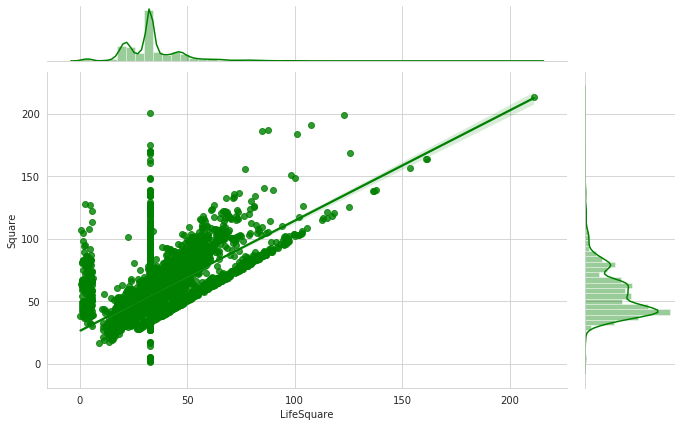

In [33]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['LifeSquare'], df_train['Square'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)


In [34]:
df_test.loc[(df_test['LifeSquare'] > 150) & (df_test['Square'] < 100), 'LifeSquare'] = df_train['LifeSquare'].median()

In [35]:
df_test.loc[(df_test['LifeSquare'] > 0) & (df_test['Square'] < 15), 'LifeSquare'] = df_train['LifeSquare'].median()

In [36]:
df_test.loc[(df_test['LifeSquare']) >= (df_test['Square']) , 'LifeSquare'] = df_train['LifeSquare'].median()

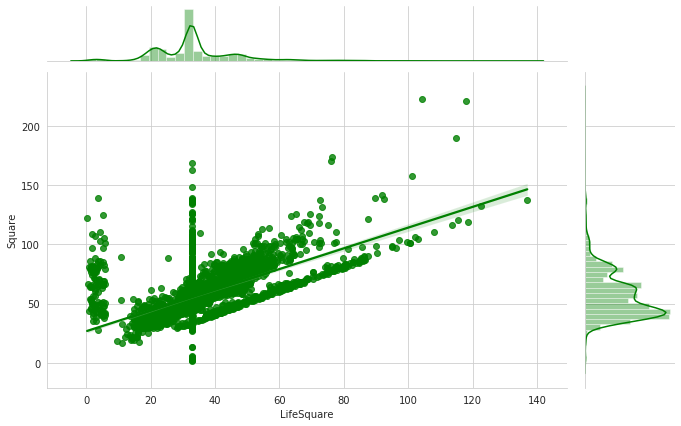

In [37]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_test['LifeSquare'], df_test['Square'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)


# KitchenSquare

In [38]:
df_train['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
41.0         2
112.0        2
25.0         2
43.0         2
51.0         2
37.0         2
32.0         2
30.0         2
58.0         2
72.0         1
96.0         1
66.0         1
48.0         1
40.0         1
2014.0       1
35.0         1
60.0         1
78.0         1
27.0         1
84.0         1
62.0         1
42.0         1
63.0         1
39.0         1
1970.0       1
36.0         1
75.0         1
26.0         1
21.0         1
29.0         1
23.0         1
73.0         1
123.0        1
31.0         1
53.0         1
54.0         1
Name: KitchenSquare, dtype: int64

In [39]:
df_test['KitchenSquare'].value_counts()

1.0      1191
5.0       612
8.0       606
6.0       595
10.0      558
9.0       417
0.0       335
7.0       297
12.0      132
11.0      107
13.0       33
4.0        21
14.0       20
15.0       17
16.0       13
3.0        11
17.0        5
2.0         4
42.0        3
18.0        3
19.0        2
20.0        2
112.0       1
61.0        1
33.0        1
34.0        1
620.0       1
57.0        1
97.0        1
65.0        1
62.0        1
30.0        1
40.0        1
44.0        1
60.0        1
22.0        1
24.0        1
41.0        1
Name: KitchenSquare, dtype: int64

In [40]:
df_train.loc[(df_train['KitchenSquare'] < 4) | (df_train['KitchenSquare'] < 0), 'KitchenSquare'] = 3
df_train.loc[df_train['KitchenSquare'] > 250, 'KitchenSquare'] = df_train['KitchenSquare'].median()

In [41]:
df_train.loc[(df_train['KitchenSquare'] > 35) & (df_train['Square'] < 125), 'KitchenSquare'] = df_train['Square'] - df_train['LifeSquare'] 

In [42]:
df_train.loc[(df_train['KitchenSquare']) >= (df_train['Square']), 'KitchenSquare'] = df_train['Square'] - df_train['LifeSquare']

In [43]:
df_train.loc[(df_train['KitchenSquare'] <= 3), 'KitchenSquare'] = 3 # Когда из-за отриц. разности Общей - Жилой пл.,площадь кухни стала отрицательной

In [44]:
df_train['KitchenSquare'].median()

6.0

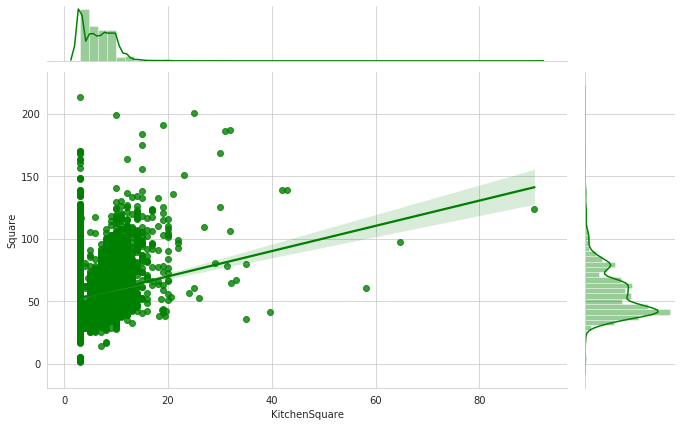

In [45]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['KitchenSquare'], df_train['Square'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

In [46]:
df_test.loc[(df_test['KitchenSquare'] < 4) | (df_test['KitchenSquare'] < 0), 'KitchenSquare'] = 3
df_test.loc[df_test['KitchenSquare'] > 250, 'KitchenSquare'] = df_train['KitchenSquare'].median()

In [47]:
df_test.loc[(df_test['KitchenSquare'] > 35) & (df_test['Square'] < 125), 'KitchenSquare'] = df_test['Square'] - df_test['LifeSquare']

In [48]:
df_test.loc[(df_test['KitchenSquare']) >= (df_test['Square']), 'KitchenSquare'] = df_test['Square'] - df_test['LifeSquare']

In [49]:
df_test.loc[(df_test['KitchenSquare'] <= 3), 'KitchenSquare'] = 3

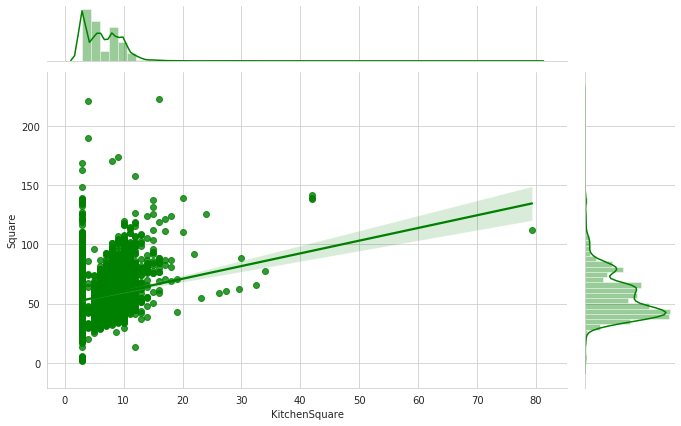

In [50]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_test['KitchenSquare'], df_test['Square'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

# Rooms

In [51]:
df_train['Rooms'].value_counts().sort_values()

19.0       1
6.0        1
10.0       2
0.0        8
5.0       18
4.0      150
3.0     2235
1.0     3705
2.0     3880
Name: Rooms, dtype: int64

In [52]:
df_train['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [53]:
df_train.loc[(df_train['Rooms'] > 5) | (df_train['Rooms'] < 1), 'Rooms'] = 2

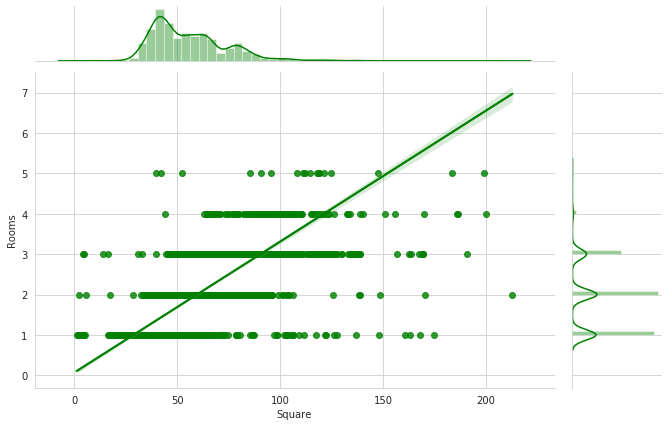

In [54]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['Square'], df_train['Rooms'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

In [55]:
df_test['Rooms'].value_counts().sort_values()

17.0       1
0.0        2
6.0        2
5.0        7
4.0       90
3.0     1099
1.0     1769
2.0     2030
Name: Rooms, dtype: int64

In [56]:
df_test.loc[(df_test['Rooms'] > 5) | (df_test['Rooms'] < 1), 'Rooms'] = 2

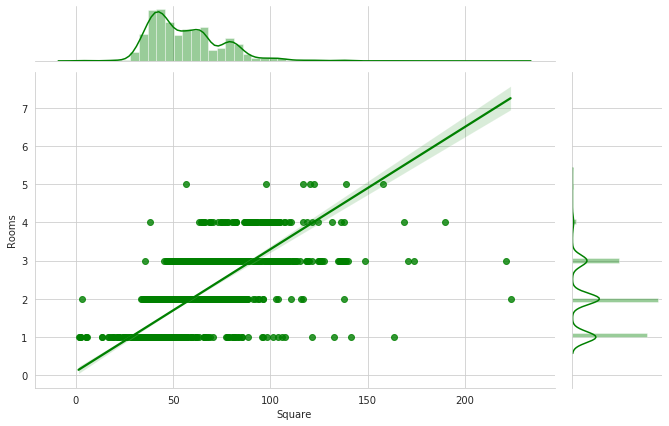

In [57]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_test['Square'], df_test['Rooms'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

# Floor and FloorHouse

In [58]:
df_train['Floor'].sort_values().value_counts()

4     949
5     876
3     872
6     802
7     759
8     643
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
28      3
32      2
42      1
33      1
37      1
31      1
Name: Floor, dtype: int64

In [59]:
df_train.loc[(df_train['HouseFloor']) > 25, 'HouseFloor'] = df_train['HouseFloor'].mode()

In [76]:
df_train.loc[(df_train['Floor']) > (df_train['HouseFloor']), 'Floor'] = df_train['Floor'].mode()

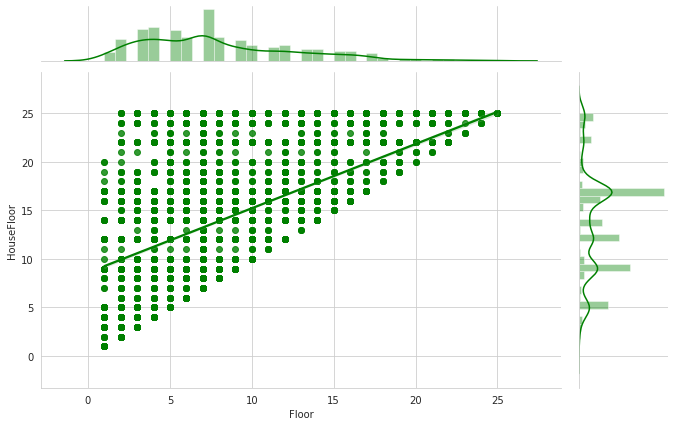

In [77]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['Floor'], df_train['HouseFloor'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

In [78]:
df_test.loc[(df_test['HouseFloor']) > 25, 'HouseFloor'] = df_train['HouseFloor'].mode()

In [79]:
df_test.loc[(df_test['Floor']) > (df_test['HouseFloor']), 'Floor'] = df_train['Floor'].mode()

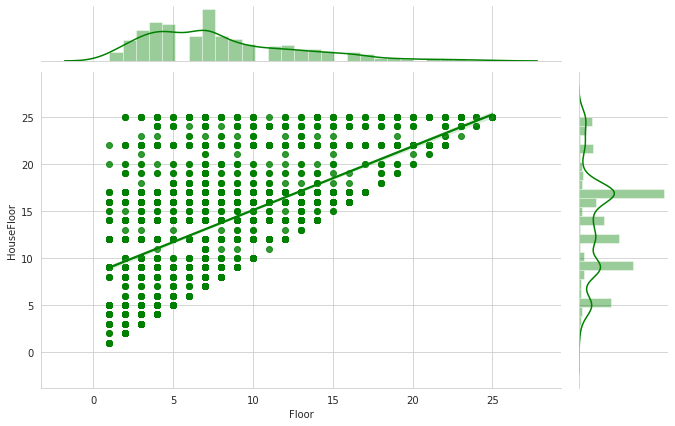

In [80]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_test['Floor'], df_test['HouseFloor'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

In [65]:
df_train['Floor'].fillna(df_train['Floor'].mode(), inplace = True)

In [66]:
df_test['Floor'].fillna(df_train['Floor'].mode(), inplace = True)

In [67]:
df_train['Floor'].median()

7.0

In [68]:
df_train['HouseFloor'].median()

12.0

In [81]:
df_train.loc[(df_train['Floor'].isnull()), 'Floor'] = 7

In [82]:
df_train.loc[(df_train['HouseFloor'].isnull()), 'HouseFloor'] = 12

In [83]:
df_test.loc[(df_test['Floor'].isnull()), 'Floor'] = 7

In [84]:
df_test.loc[(df_test['HouseFloor'].isnull()), 'HouseFloor'] = 12

In [85]:
df_train['Floor'].value_counts().sort_values()

25.0      14
23.0      18
24.0      29
21.0      40
22.0      40
20.0      47
19.0      51
18.0      60
17.0     196
1.0      228
15.0     233
16.0     240
14.0     286
13.0     289
11.0     345
10.0     382
12.0     387
9.0      524
2.0      546
6.0      582
8.0      592
5.0      773
3.0      801
4.0      832
7.0     2465
Name: Floor, dtype: int64

In [86]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DistrictId        10000 non-null  int64  
 1   Rooms             10000 non-null  float64
 2   Square            10000 non-null  float64
 3   LifeSquare        10000 non-null  float64
 4   KitchenSquare     10000 non-null  float64
 5   Floor             10000 non-null  float64
 6   HouseFloor        10000 non-null  float64
 7   HouseYear         10000 non-null  int64  
 8   Ecology_1         10000 non-null  float64
 9   Ecology_2         10000 non-null  object 
 10  Ecology_3         10000 non-null  object 
 11  Social_1          10000 non-null  int64  
 12  Social_2          10000 non-null  int64  
 13  Social_3          10000 non-null  int64  
 14  Healthcare_1      10000 non-null  float64
 15  Helthcare_2       10000 non-null  int64  
 16  Shops_1           10000 non-null  int

In [87]:
df_train[['Floor','HouseFloor']].describe()

,Floor,HouseFloor
count,10000.000000,10000.000000
mean,7.797100,12.459700
std,4.428374,6.376319
min,1.000000,0.000000
25%,5.000000,9.000000
50%,7.000000,12.000000
75%,10.000000,17.000000
max,25.000000,25.000000


# Discrict ID

In [88]:
df_train['DistrictId'] = df_train['DistrictId'].astype(str)
df_test['DistrictId'] = df_test['DistrictId'].astype(str)

In [89]:
df_train['DistrictId'].sort_values().nunique()

205

In [90]:
district_size = df_train['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

In [91]:
districts_popular = district_size.loc[district_size['DistrictSize'] > 100, 'DistrictId'].tolist()

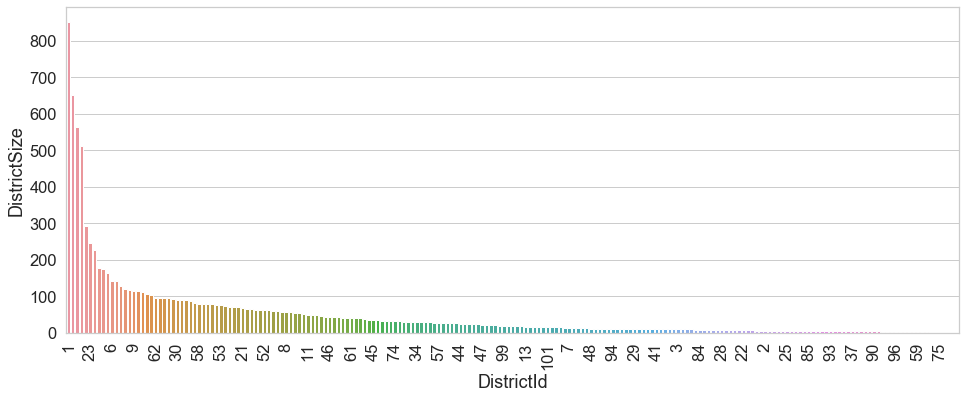

In [92]:
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y='DistrictSize', x='DistrictId', 
            data=district_size,
            order=district_size.sort_values(by='DistrictSize', ascending=False)['DistrictId']
           );
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

In [93]:
districts_popular

['27',
 '1',
 '23',
 '6',
 '9',
 '62',
 '30',
 '58',
 '53',
 '21',
 '52',
 '8',
 '11',
 '46',
 '61',
 '45',
 '74',
 '34',
 '57',
 '44']

In [94]:
district_size.loc[~district_size['DistrictId'].isin(districts_popular), 'DistrictId'] = 666
district_size = district_size.groupby('DistrictId')['DistrictSize'].agg(
                            DistrictSize='median')
district_size.reset_index(level='DistrictId', inplace=True)
district_size

,DistrictId,DistrictSize
0,666,15
1,1,652
2,11,129
3,21,165
4,23,565
5,27,851
6,30,228
7,34,111
8,44,104
9,45,116


In [95]:
df_train.loc[~df_train['DistrictId'].isin(districts_popular), 'DistrictId'] = 666
df_test.loc[~df_test['DistrictId'].isin(districts_popular), 'DistrictId'] = 666

In [96]:
df_train['DistrictId'].unique()

array([666, '53', '58', '74', '1', '23', '57', '27', '34', '11', '61',
       '44', '21', '6', '52', '62', '9', '45', '46', '8', '30'],
      dtype=object)

In [97]:
df_train = df_train.merge(district_size, on='DistrictId', how='left').set_index(df_train.index)
df_test = df_test.merge(district_size, on='DistrictId', how='left').set_index(df_test.index)

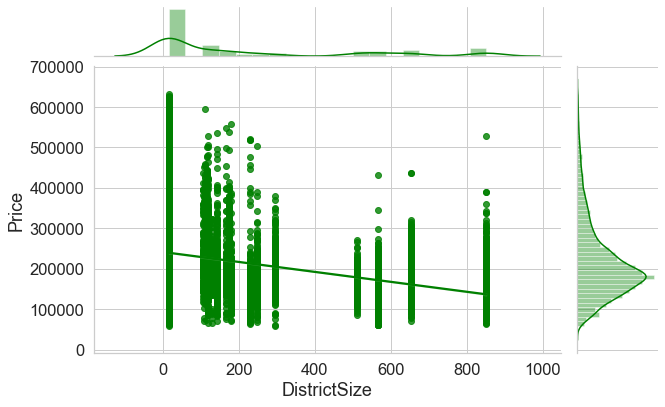

In [98]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['DistrictSize'], df_train['Price'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

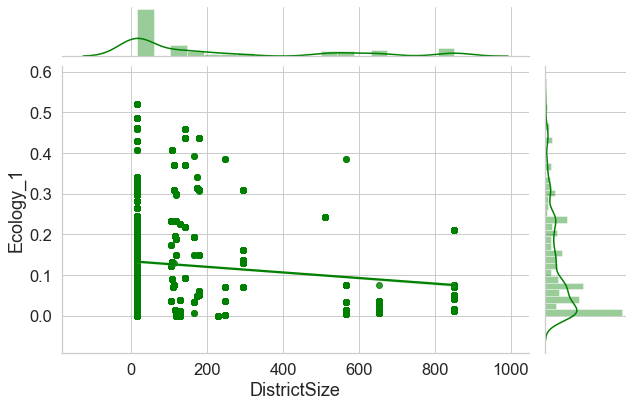

In [99]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['DistrictSize'], df_train['Ecology_1'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

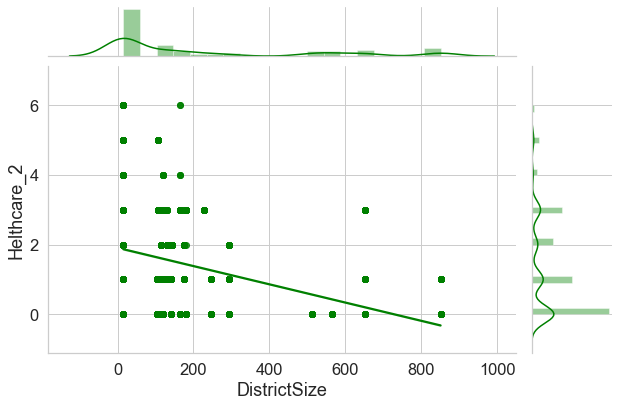

In [100]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['DistrictSize'], df_train['Helthcare_2'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

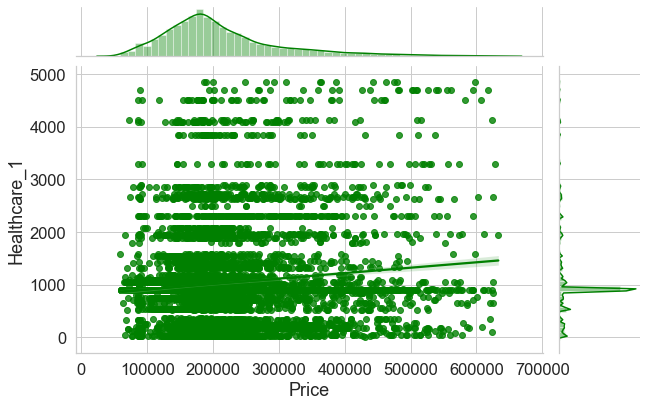

In [101]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['Price'], df_train['Healthcare_1'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

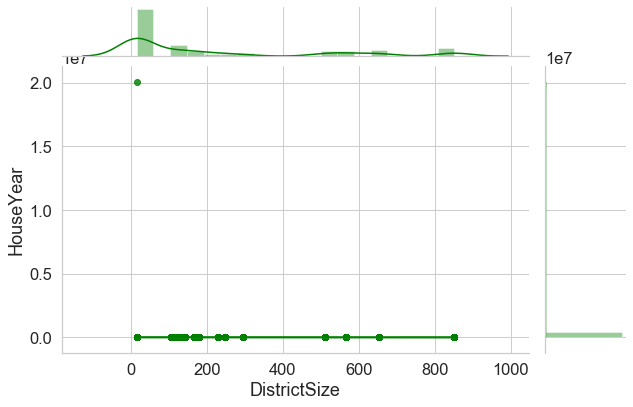

In [102]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['DistrictSize'], df_train['HouseYear'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

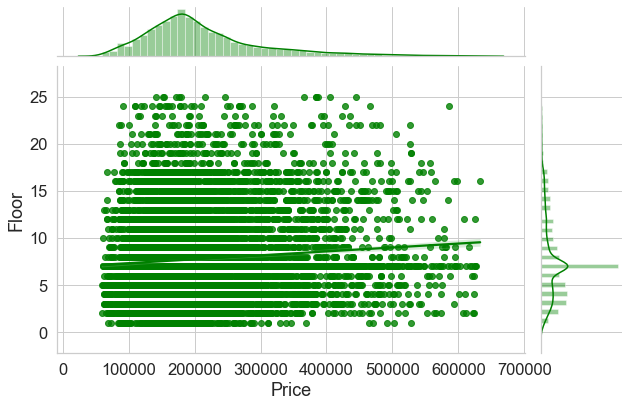

In [103]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['Price'], df_train['Floor'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

# HouseYear

In [104]:
df_train['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [105]:
df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = df_train['HouseYear'].median()

In [106]:
df_test.loc[df_test['HouseYear'] > 2020, 'HouseYear'] = df_train['HouseYear'].median()

In [107]:
df_train.corr()['Price'].sort_values()

DistrictSize       -0.372509
Ecology_1          -0.058381
Healthcare_1_log    0.022167
HouseYear           0.036574
HouseFloor          0.067979
Social_3            0.074878
Floor               0.087197
Healthcare_1        0.128059
Shops_1             0.180876
Social_2            0.239226
Helthcare_2         0.253090
Social_1            0.263286
KitchenSquare       0.300900
LifeSquare          0.404333
Rooms               0.571638
Square              0.578680
Price               1.000000
Name: Price, dtype: float64

In [108]:
feature_bin_names = ['Ecology_2', 'Ecology_3', 'Shops_2']

In [109]:
df_train[feature_bin_names] = df_train[feature_bin_names].replace({'A':0, 'B':1})
df_test[feature_bin_names] = df_test[feature_bin_names].replace({'A':0, 'B':1})

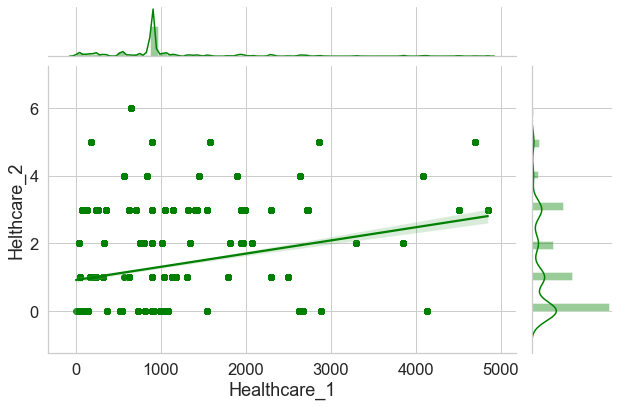

In [110]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_test['Healthcare_1'], df_test['Helthcare_2'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

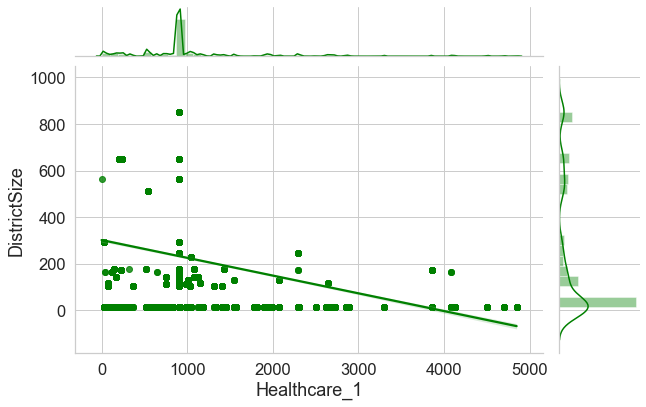

In [111]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['Healthcare_1'], df_train['DistrictSize'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

# Подбор новых признаков

In [112]:
df_train = df_train.merge(district_size, on='DistrictId', how='left').set_index(df_train.index)
df_test = df_test.merge(district_size, on='DistrictId', how='left').set_index(df_test.index)

In [113]:
df_train[['Square','LifeSquare']].describe()

,Square,LifeSquare
count,10000.000000,10000.000000
mean,56.143696,34.033181
std,19.023477,13.727218
min,1.136859,0.370619
25%,41.774881,25.686814
50%,52.512905,32.781260
75%,65.889256,37.725051
max,212.932361,211.231125


# Цена за комнату

In [114]:
df_train['PriceOneRoom'] = df_train['Price'] / df_train['Rooms']

# Цена за комнату по районам

In [115]:
price_by_district = df_train.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomByDistrict'})

In [116]:
df_train = df_train.merge(price_by_district, on=['DistrictId'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_by_district, on=['DistrictId'], how='left').set_index(df_test.index)

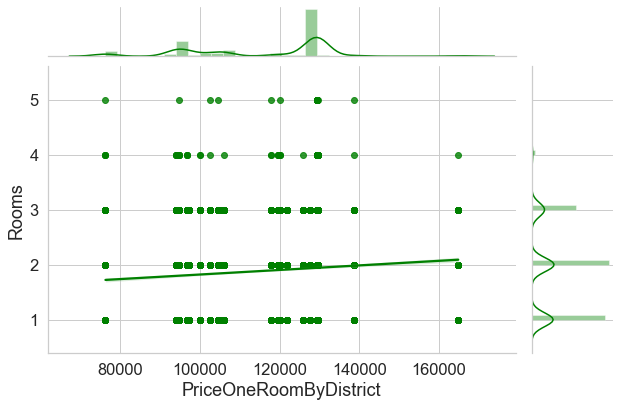

In [117]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['PriceOneRoomByDistrict'], df_train['Rooms'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

# Цена за 1 кв.м

In [118]:
df_train['Price_1m2'] = df_train['Price'] / df_train['Square']

In [119]:
price_1m2_by_district = df_train.groupby(['DistrictId'], as_index=False)\
                        .agg({'Price_1m2':'median'})\
                        .rename(columns={'Price_1m2':'Price_1m2_ByDistrict'})

In [120]:
df_train = df_train.merge(price_1m2_by_district, on=['DistrictId'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_1m2_by_district, on=['DistrictId'], how='left').set_index(df_test.index)

In [121]:
df_train = df_train.merge(district_size, on='DistrictId', how='left').set_index(df_train.index)
df_test = df_test.merge(district_size, on='DistrictId', how='left').set_index(df_test.index)

# Построение модели 

In [122]:
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.float_format', lambda x: '%.3f' % x)


def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 3)) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_test, pred_values_test), 3))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train.flatten(), y=true_values_train.flatten())
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test.flatten(), y=true_values_test.flatten())
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [123]:
df_train.corr()['Price'].sort_values()

DistrictSize             -0.373
DistrictSize_y           -0.373
DistrictSize_x           -0.373
Ecology_1                -0.058
Ecology_3                -0.053
Healthcare_1_log          0.022
Ecology_2                 0.022
HouseYear                 0.037
HouseFloor                0.068
Shops_2                   0.070
Social_3                  0.075
Floor                     0.087
Healthcare_1              0.128
Shops_1                   0.181
Social_2                  0.239
Price_1m2                 0.245
Helthcare_2               0.253
Social_1                  0.263
KitchenSquare             0.301
PriceOneRoom              0.348
LifeSquare                0.404
Price_1m2_ByDistrict      0.438
PriceOneRoomByDistrict    0.438
Rooms                     0.572
Square                    0.579
Price                     1.000
Name: Price, dtype: float64

In [131]:
feature_names = [
#         'DistrictId',
             'Rooms',
             'Square',
             'LifeSquare',
             'KitchenSquare',
             'Floor',
             'HouseFloor',
             'HouseYear',
              'Ecology_1',
             'Ecology_2',
             'Ecology_3',
             'Social_1',
             'Social_2',
             'Social_3',
             'Healthcare_1',
             'Helthcare_2',
#            'Shops_1',
#             'Shops_2',
#             'Price',
             'DistrictSize',
#       'PriceOneRoom',
             'PriceOneRoomByDistrict',
             'Price_1m2_ByDistrict',
#             'RoomSquare',
#             'Floor_cat',
#             'HouseFloor_cat',
#             'StoreysFloor',
#             'PriceOneRoomByStoreysFloor'
]

In [132]:
feature_names

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'DistrictSize',
 'PriceOneRoomByDistrict',
 'Price_1m2_ByDistrict']

In [133]:
target_name = ['Price']

In [134]:
X = df_train[feature_names]
y = df_train[target_name].values
X_test = df_test[feature_names]


In [135]:
forest = RandomForestRegressor(max_depth=20, 
                               max_features=6, 
                               n_estimators=400,
                               random_state=42)

In [301]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_score = cross_val_score(forest, X, y, scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.74963


In [136]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_score = cross_val_score(forest, X, y, scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.74912


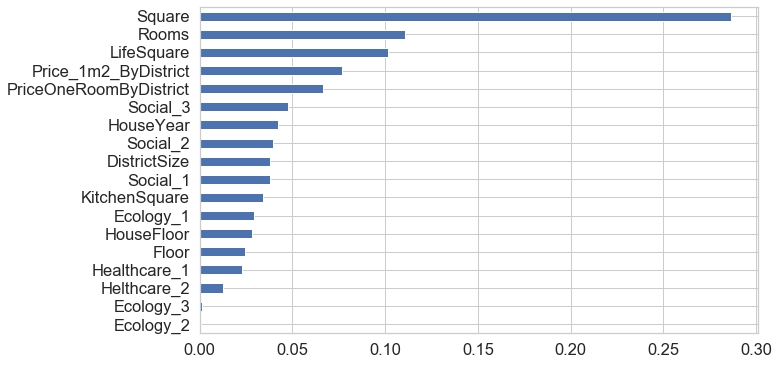

In [137]:
forest.fit(X, y)
importances = forest.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=True, inplace=True)

feat_importances.plot(kind='barh', figsize=(10, 6));

# Настройка гиперпараметров

In [138]:
params = {
    'n_estimators': [400],
    'max_depth': [20],
    'max_features': [6]
}

In [139]:
forest_grid = GridSearchCV(forest, params, scoring='r2', 
                  cv=KFold(n_splits=10, random_state=42, shuffle=True), 
                  n_jobs=-1)
forest_grid.fit(X, y)
print(forest_grid.best_params_)
print('R2 на train: {:.5f}'.format(forest_grid.best_score_))

{'max_depth': 20, 'max_features': 6, 'n_estimators': 400}
R2 на train: 0.74912


# Прогнозирование на тестовом датасете

In [140]:
forest_best = forest_grid.best_estimator_

In [141]:
y_pred = forest_best.predict(X_test)

preds = pd.DataFrame()
preds['Id'] = X_test.index
preds['Price'] = y_pred
X_test = df_test[feature_names]

In [ ]:
preds = pd.DataFrame()
preds['Id'] = test.index
preds['Price'] = y_pred

In [142]:
preds.head()

,Id,Price
0,725,160349.717
1,15856,232282.242
2,5480,301548.303
3,15664,338103.181
4,14275,146637.604


In [143]:
preds.shape

(5000, 2)

In [144]:
preds.to_csv('/Users/ars/GU_AI/GU_Numpy_Pandas/project_task/AKravtsov_predictions1.csv', index=False)

In [291]:
PREPARED_DATASET_PATH1_train = '/Users/ars/GU_AI/GU_Numpy_Pandas/project_task/train2.csv'

In [292]:
PREPARED_DATASET_PATH1_test = '/Users/ars/GU_AI/GU_Numpy_Pandas/project_task/test2.csv'

In [293]:
df_train.to_csv(PREPARED_DATASET_PATH1_train, index=False, encoding='utf-8')

In [294]:
df_test.to_csv(PREPARED_DATASET_PATH1_test, index=False, encoding='utf-8')